
> DA623 (2024)

> Manish Kumar - 200102108

> TOPIC: Matrix Decompositions, types and Practical usefulness (3)

> GITHUB LINK: pass




In [177]:
import matplotlib.pyplot as plt
import networkx as nx
from scipy.linalg import lu, svd, diagsvd
import numpy as np
from numpy.linalg import cholesky, qr, eigh, eigvals
from PIL import Image
# plt.rcParams['figure.figsize'] = [8, 8]

## $LU$ Decomposition

* $LU$ (Lower traingular - Upper triangualr matrix)
* Given square matrix can have many possible LU factorizations
* The decomposition is unique if we fix $L$ to be a Lower unit triangular matrix (all diagonal elemetns = 1)


### Method/Algo.

**THEORY :**

Given a square matrix $A_{n \times n}$, we decompose it as:
$$A = LU$$
where,
$$L_{n \times n} = \begin{bmatrix}
    1 & 0 & 0 & \dots  & 0 \\
    l_{21} & 1 & 0 & \dots  & 0 \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    l_{n1} & l_{n2} & l_{n3} & \dots  & 1
\end{bmatrix}$$

$$U_{n \times n} = \begin{bmatrix}
    u_{11} & u_{12} & u_{13} & \dots  & u_{1n} \\
    0 & u_{22} & u_{23} & \dots  & u_{2n} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    0 & 0 & 0 & \dots  & u_{nn}
\end{bmatrix}$$

for $L$, we have $l_{ij} = 0;$ $\forall j > i$ and $l_{kk} = 1; \forall k \in \{1,2,...,n\}$.

for $U$, we have $u_{ij} = 0;$ $\forall j < i$.


**ALGORITHM :**


In [262]:
def factorize_LU(A:np.ndarray):
  '''
  input: A -> nxn shape matrix
  output: L -> nxn matrix
          U -> nxn matrix
  '''
  assert A.shape[0] == A.shape[1]
  n = A.shape[0]
  # init.
  L, U = np.eye(n), A.copy()

  for pivot_ro in range(n):
    pivot_el = U[pivot_ro , pivot_ro] # fix a pivot
    assert pivot_el != 0 # assuming simple case with all non-zero pivots
    for curr_ro in range(pivot_ro + 1, n): # loop all rows below pivot row and apply row operations
      multiplier = U[curr_ro, pivot_ro] / pivot_el
      U[curr_ro] = U[curr_ro] - multiplier*U[pivot_ro]
      L[curr_ro, pivot_ro] = multiplier
  return L, U

In [ ]:
A = np.random.randn(3,3)
L, U = factorize_LU(A)
print('A :\n', A)
print('L:\n', L)
print('U:\n', U)
print('L*U:\n', L @ U)

A :
 [[ 0.61614485 -0.42833207  0.37630944]
 [-0.52179581  1.46697195  1.46908072]
 [-1.1634895   1.93718726 -1.06645831]]
L:
 [[ 1.          0.          0.        ]
 [-0.84687198  1.          0.        ]
 [-1.88833761  1.02184526  1.        ]]
U:
 [[ 0.61614485 -0.42833207  0.37630944]
 [ 0.          1.10422952  1.78776664]
 [ 0.          0.         -2.18267991]]
L*U:
 [[ 0.61614485 -0.42833207  0.37630944]
 [-0.52179581  1.46697195  1.46908072]
 [-1.1634895   1.93718726 -1.06645831]]


In [ ]:
# using in-built library fn. generalized PLU decomposition
l, u = lu(A, permute_l=True) # to return L as already permuted
print('L:\n', l)
print('U:\n', u)
print('L*U:\n', l @ u)

L:
 [[-0.52956632  0.99890492  1.        ]
 [ 0.44847488  1.          0.        ]
 [ 1.          0.          0.        ]]
U:
 [[-1.1634895   1.93718726 -1.06645831]
 [ 0.          0.59819213  1.94736048]
 [ 0.          0.         -2.13367893]]
L*U:
 [[ 0.61614485 -0.42833207  0.37630944]
 [-0.52179581  1.46697195  1.46908072]
 [-1.1634895   1.93718726 -1.06645831]]


### Practical Use

1. Solving system of linear eqn. (faster)
2. determinant calculation

In [293]:
def get_U(A:np.ndarray):
  '''
  returns upper triangular matrix for genral mxn matrix
  '''
  m, n = A.shape
  for pivot_ro in range(m):
    pivot_el = A[pivot_ro , pivot_ro]
    assert pivot_el != 0
    for curr_ro in range(pivot_ro + 1, m):
      multiplier = A[curr_ro, pivot_ro] / pivot_el
      A[curr_ro] = A[curr_ro] - multiplier*A[pivot_ro]
  return A

def back_subs(A , b):
  '''
  input : A -> mxn matrix
          b -> nx1 vector
  output : solves Ax = b for x and return it
  '''
  m , n = A.shape
  assert A.shape[0] == b.shape[0]
  assert b.shape[1] == 1

  U = get_U(np.concatenate((A , b) ,axis=1 )) # concatenate A with b
  A_ = U[ : , :-1].reshape(m,n)
  b_ = U[ : , -1].reshape(m,1)
  x = np.zeros((n , 1))
  # perform back subs
  for ro in reversed(range(m)):
    bi = b_[ro, 0]
    res = (bi - np.dot(A_[ro , ro+1 : ] , x[ro+1: ]) )/ A_[ro, ro]
    x[ro] = res

  return x

In [290]:
A = np.random.randn(3,3)
b = np.random.rand(3,1)

In [291]:
x_ = back_subs(A,b)
print(x_)

[[ 1.05464369]
 [-0.30169508]
 [-0.52561402]]


In [292]:
## ensure it matches (using np library fn.)
np.linalg.solve(A, b.flatten())

array([ 1.05464369, -0.30169508, -0.52561402])

In [294]:
## finding determinant is also faster
## |A| = |LU| = |L|.|U| = 1*prod. of diagonal elements in U
A = np.random.randn(10,10)
_, U = factorize_LU(A)
det = 1
for i in range(10):
  det *= U[i,i]

# check this method and inbuilt one
print(det, np.linalg.det(A))

-630.3150928854874 -630.3150928854869


## Singular Value Decomposition (SVD)

### Method/Algo.

**THEORY :**

Given a square matrix $A_{m \times n}$, we decompose it as:
$$A = U\Sigma V^{T}$$
where,

$$U_{n \times n} = \begin{bmatrix}
    \vert & \vert & & \vert \\
    u_{1}   & u_{2} &\dots &  u_{m}\\
    \vert & \vert & & \vert
\end{bmatrix}$$

$$V_{n \times n}^{T} = \begin{bmatrix}
    - & v_{1}^{T} & - \\
    - & v_{2}^{T} & - \\
     & \vdots & \\
    - & v_{n}^{T} & -
\end{bmatrix}$$

$$\Sigma_{m \times n} = \begin{bmatrix}
    \sigma_{1} & 0 & 0 & \dots \\
    0 & \sigma_{2} & 0 & \dots \\
    0 & 0 &\sigma_{3} & \dots \\
    \vdots & \vdots & \vdots & \ddots\\
\end{bmatrix}$$

$U_{m \times m}$ (containing left singular vectors) and $V_{n \times n}$ (containing right singular vectors) are orthogonal sq. matrices.
i.e $U^{T} U = I_{n}$ and $V^{T} V = I_{m}$

$\Sigma_{m \times n}$ contains singular values ($\sigma_{i}$) in its diagonal st.

$$\sigma_{1} \ge \sigma_{2} \ge \sigma_{3} ...$$




**ALGORITHM :**

We have:
$$\begin{align*}A^{T}A &= V\Sigma^{T} (U^{T} U)\Sigma V^{T}\\
&=V (\Sigma^{T} \Sigma) V^{T}\\
\end{align*}$$

So, $V$ corresponds to the eigenvector matrix (using eigen decomposition) of $A^{T}A$ ans its eigenvalues corresponds to the square of singular values.

Using similar method we get $U$ as eigenvector matrix of $AA^{T}$

However, for practical computations of SVD and Eigenvalue Decomposition, numerical methods are used.

In [ ]:
A = np.random.randn(3,5)
U, sigmas, VT = svd(A) # get svd
# construct diag matrix from singular values
Sigma = diagsvd(sigmas, 3, 5)

print("U:\n", U, '\n')
print("Sigma:\n", Sigma, '\n')
print("V_T:\n", VT, '\n')

U:
 [[-0.39507109 -0.63075136  0.66788589]
 [ 0.82892551  0.06861933  0.55513412]
 [-0.39598148  0.77294509  0.49573638]] 

Sigma:
 [[3.13619162 0.         0.         0.         0.        ]
 [0.         2.22784541 0.         0.         0.        ]
 [0.         0.         0.58229509 0.         0.        ]] 

V_T:
 [[ 0.01216137 -0.62905119 -0.18410202 -0.02610433  0.75469975]
 [ 0.04905351 -0.41064031  0.32326237  0.81780897 -0.23591994]
 [-0.84550152  0.26319757  0.30773349  0.15161627  0.31331586]
 [-0.22925402  0.14002994 -0.87021576  0.40558533 -0.07784143]
 [ 0.47959945  0.58888691  0.09814535  0.37817999  0.5201384 ]] 



In [ ]:
# compare
print('A:\n', A, '\n')
print('U*Sigma*V_T:\n', U @ Sigma @ VT, '\n')

A:
 [[ 0.41710829 -1.43444784 -0.15963465 -1.38993544 -0.06555295]
 [ 0.6422191  -1.56090319 -0.98032097 -0.92901758 -0.62140281]
 [ 0.21850282 -0.15175779  0.67124447 -0.91372029 -0.88807811]] 

U*Sigma*V_T:
 [[ 0.41710829 -1.43444784 -0.15963465 -1.38993544 -0.06555295]
 [ 0.6422191  -1.56090319 -0.98032097 -0.92901758 -0.62140281]
 [ 0.21850282 -0.15175779  0.67124447 -0.91372029 -0.88807811]] 



### Practical Use

* Image compression
* PCA



In [69]:
# image compression (rank r approximarion)
def compress_matrix(M:np.ndarray, r:int, get_uv=False):
  '''
  input : mxn matrix
  output: its r-rank approximation
  '''
  m,n = M.shape
  assert r < min(m, n)
  # do svd
  U, sigmas, VT = svd(M)
  Sigma = diagsvd(sigmas, m, n)
  # taking 1st r cols. of U, rxr block of Sigma and 1st r rows of VT
  compressed_M = U[:,:r] @ Sigma[:r,:r] @ VT[:r,:]
  if not get_uv:
    return compressed_M
  return compressed_M, U[:,:r], VT[:r,:]

def compress_image(image:np.ndarray, r:int=5):
  '''
  input: image (RGB or BW)
         rank is number of top singular values to retain (less r => more compression)
  output: compressed image of same dim.
  '''
  m, n = image.shape[0], image.shape[1]
  image_compressed = np.zeros(image.shape)

  if len(list(image.shape)) < 3:
    # bw case
    image_compressed = compress_matrix(image, r)
  else:
    # rgb
    for c in range(3):
      image_compressed[:,:,c] = compress_matrix(image[:,:,c], r)
      # svd for each channel
  image_compressed[image_compressed < 0] = 0
  image_compressed[image_compressed > 255] = 255
  return image_compressed.astype('int')

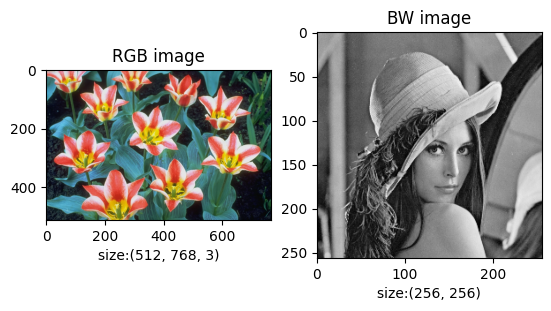

In [80]:
IMG1 = '/content/drive/MyDrive/NOTEBOOK/image_processing/images/tulips.png'
IMG2 = '/content/drive/MyDrive/NOTEBOOK/image_processing/images/lena_gray_256.tiff'
image1 = np.array(Image.open(IMG1))
image2 = np.array(Image.open(IMG2))

fig, axes = plt.subplots(1, 2)
axes[0].imshow(image1)
axes[0].set_title('RGB image')
axes[0].set_xlabel(f'size:{image1.shape}')
axes[1].imshow(image2, cmap='gray')
axes[1].set_title('BW image')
axes[1].set_xlabel(f'size:{image2.shape}')

plt.show()

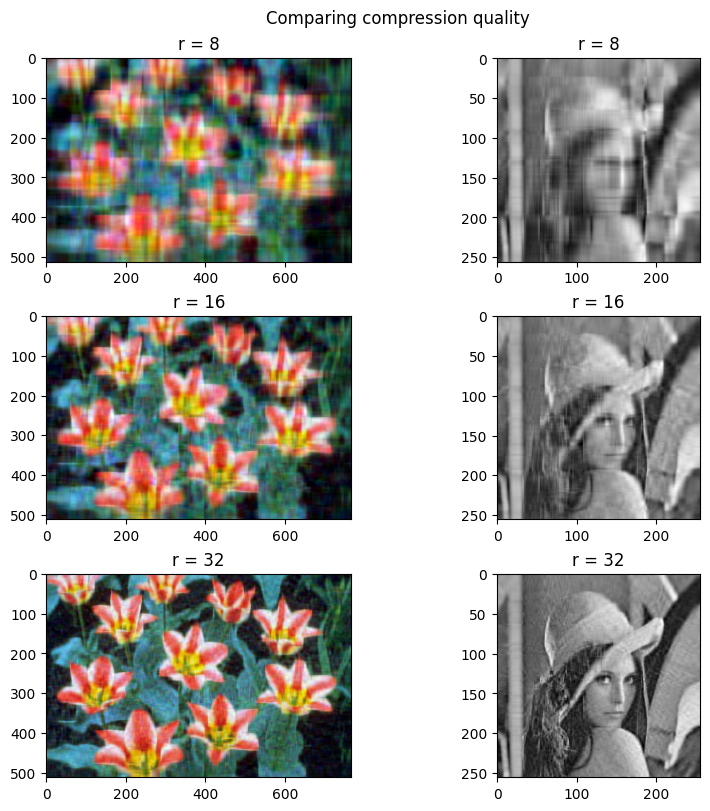

In [ ]:
r_val = [8, 16, 32] # rank r approximation
fig, axes = plt.subplots(3, 2, constrained_layout = True)
fig.suptitle('Comparing compression quality')
for idx in range(3):
  # axes[idx,0].set_axis_off()
  # axes[idx,1].set_axis_off()

  axes[idx,0].imshow(compress_image(image1, r_val[idx]))
  axes[idx,0].set_title(f'r = {r_val[idx]}')
  axes[idx,1].imshow(compress_image(image2, r_val[idx]), cmap='gray')
  axes[idx,1].set_title(f'r = {r_val[idx]}')
plt.show()

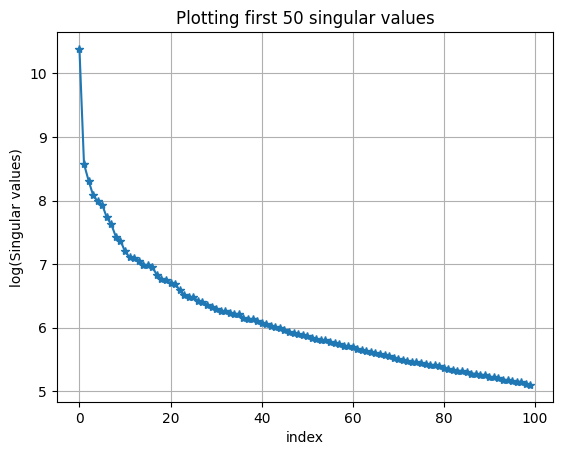

In [96]:
# plot of singular values of image showing dominant terms
# shows the presence of redundency
_, sig, _ = svd(image2)
plt.plot(np.log(sig[:100]), '-*') #log plot
plt.grid()
plt.title('Plotting first 50 singular values')
plt.ylabel('log(Singular values)')
plt.xlabel('index')
plt.show()

In [48]:
# PCA for dimensionality reduction
### synthetic dataset as mixture of gaussians
### let number of features be 3
mean1, mean2 = [5, 0, 5], [-10, 1, -4]
cov1 = [[2,0.3,0],
        [0.3,1,0],
        [0,0,1]]
cov2 = [[1,-0.1,0.1],
        [-0.1,1,0],
        [0.1,0,1]]
N = 100
cluster1 = np.random.multivariate_normal(mean1, cov1, size=N)
cluster2 = np.random.multivariate_normal(mean2, cov2, size=N)
cluster_label = np.random.rand(N) < 0.4
ds = cluster1.T*cluster_label + cluster2.T*(1-cluster_label)
ds = ds.T
print('shape:', ds.shape)

shape: (100, 3)


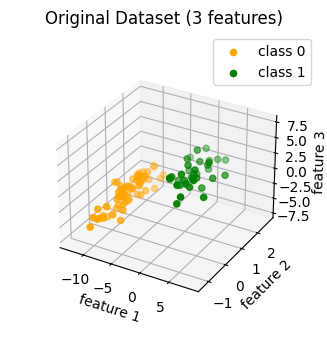

In [75]:
# view dataset in 3D space
fig = plt.figure(figsize=[8,4])
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect(aspect=None, zoom = 0.8)
ax.scatter(ds[cluster_label == 0 , 0], ds[cluster_label == 0,1], ds[cluster_label==0,2], color='orange', label='class 0')
ax.scatter(ds[cluster_label == 1 , 0], ds[cluster_label == 1,1], ds[cluster_label==1,2], color='green', label='class 1')
# ax.scatter(ds[:, 0], ds[:,1], ds[:,2], color='black')
ax.set_xlabel('feature 1')
ax.set_ylabel('feature 2')
ax.set_zlabel('feature 3')
plt.title('Original Dataset (3 features)')
plt.legend()
plt.show()

In [63]:
# computing Covariance matrix
cov_matrix = np.cov(ds.T)
cov_matrix.shape

(3, 3)

In [70]:
_, U, VT = compress_matrix(cov_matrix, r=2, get_uv=True) #svd
U # cols are the reduced set of singular vectors corresponding to dominant singular values

array([[-0.84384345, -0.53273988],
       [ 0.05970021,  0.0256156 ],
       [-0.53325803,  0.84589128]])

In [72]:
ds_reduced = (ds - np.mean(ds, axis=0)) @ U
ds_reduced.shape # feature size reduction from 3 to 2

(100, 2)

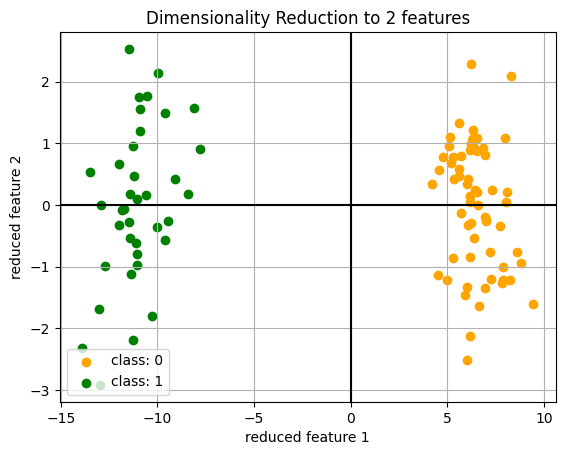

In [79]:
plt.scatter(ds_reduced[cluster_label == 0 , 0], ds_reduced[cluster_label == 0 , 1], color='orange', label='class: 0')
plt.scatter(ds_reduced[cluster_label == 1 , 0], ds_reduced[cluster_label == 1 , 1], color='green', label='class: 1')
plt.xlabel('reduced feature 1')
plt.ylabel('reduced feature 2')
plt.title('Dimensionality Reduction to 2 features')
plt.legend()
plt.axhline(color='black')
plt.axvline(color='black')
plt.grid()
plt.show()


## Cholesky Decomposition

* Applicable for symmetric positive definite matrix
* A is symmetric if $A^{T} = A$
* $A$ (symmetric matrix) is positive definite iff $z^{T}Az > 0$ $\forall z$

### Method/Algo.

**THEORY :**

Given a symmetric positive-definite square matrix $A_{n \times n}$, we decompose it as:
$$A = LL^{T}$$
where,
$$L_{n \times n} = \begin{bmatrix}
    l_{11} & 0 & 0 & \dots  & 0 \\
    l_{21} & l_{22} & 0 & \dots  & 0 \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    l_{n1} & l_{n2} & l_{n3} & \dots  & l_{nn}
\end{bmatrix}$$

$L$ is lower traingular matrix with positive diagonal elements.




In [109]:
A_ = np.random.rand(4,4) # random matrix is full rank with high probability
A = A_ @ A_.T # symmetric also so positive definite
print('A:\n', A)

array([[1.88375362, 1.56119339, 1.02570985, 1.81730439],
       [1.56119339, 1.96658401, 1.37033719, 1.76104138],
       [1.02570985, 1.37033719, 1.0116799 , 1.19025118],
       [1.81730439, 1.76104138, 1.19025118, 1.85753896]])

In [111]:
L = cholesky(A)
print('L:\n', L, '\n')
print('L*L_T:\n', L @ L.T)

L:
 [[1.37249904 0.         0.         0.        ]
 [1.13748232 0.82019387 0.         0.        ]
 [0.7473301  0.63431638 0.22543369 0.        ]
 [1.32408427 0.31080327 0.01586074 0.08654236]] 

L*L_T:
 [[1.88375362 1.56119339 1.02570985 1.81730439]
 [1.56119339 1.96658401 1.37033719 1.76104138]
 [1.02570985 1.37033719 1.0116799  1.19025118]
 [1.81730439 1.76104138 1.19025118 1.85753896]]


### Practical Use

* Generating correlated random variables

In [124]:
N = 1000
X, Y = np.random.randn(1, N), np.random.randn(1, N) # simulating intependent Random variables
# as expected X and Y should be uncorrelated (Cov matrix ~ Identity)
np.cov(X, Y)

array([[1.05876225, 0.01333439],
       [0.01333439, 1.04134967]])

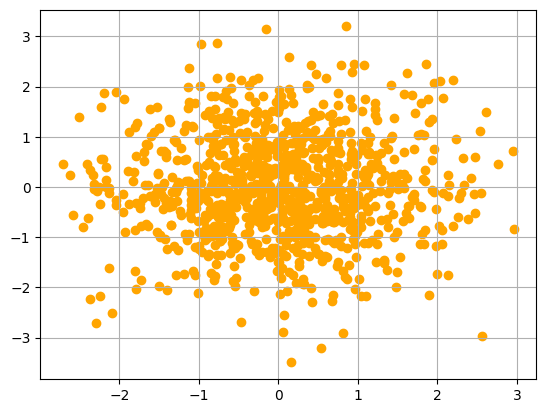

In [125]:
plt.scatter(X, Y, color='orange')
plt.grid()

In [127]:
# lets say we want to sample from a distribution with given covariance matrix
cov = np.array([[4, -1],
                [-1, 2]])
# we can transform the generated uncorelated random variables as
L = cholesky(cov)
XY = np.vstack((X,Y))
UV = L @ XY

U = UV[0,:]
V = UV[1,:]
np.cov(U, V)

array([[ 4.23504898, -1.02348277],
       [-1.02348277,  2.06941275]])

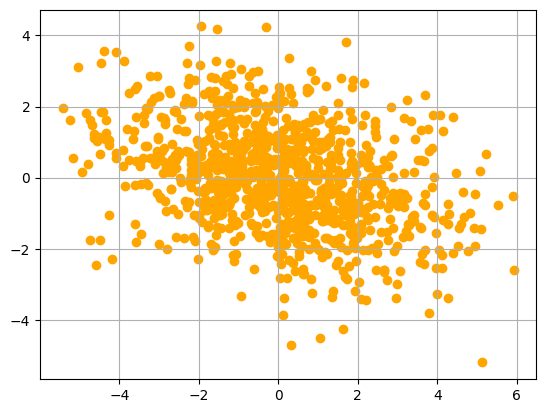

In [128]:
plt.scatter(U, V, color='orange')
plt.grid()

Proof:

$X$ and $Y$ are two uncorrelated 0 mean RVs.

then , $Cov(X, Y) = E[XY^{*}] = I_{2}$

Let, $C = LL^{*}$ i.e the cholesky decomposition. Now take two random variables $U$ and $V$ s.t $U = LV$

Now $E[UU^{*}] = E[LVV^{*}L] = L.E[VV^{*}].L^{*} = LIL^{*} = C$



## $QR$ Decomposition

### Method/Algo.

**THEORY :**

Given a matrix $A_{m \times n}$, we decompose it as:
$$A = QR$$
where,
$$Q_{m \times n} = \begin{bmatrix}
    \vert & \vert & & \vert \\
    q_{1}   & q_{2} &\dots &  q_{n}\\
    \vert & \vert & & \vert
\end{bmatrix}$$
$$R_{n \times n} = \begin{bmatrix}
    r_{11} & r_{12} & r_{13} & \dots  & r_{1n} \\
    0 & r_{22} & r_{23} & \dots  & r_{2n} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    0 & 0 & 0 & \dots  & r_{nn}
\end{bmatrix}$$

$R$ is upper traingular matrix and $Q$ is orthonormal i.e $QQ^{T} = I_{m}$. All the $q_{i's}$ are orthogonal vectors.


In [132]:
A = np.random.randn(3, 5)
Q, R = qr(A)
print('Q:\n', Q, '\n')
print('R:\n', R, '\n')

Q:
 [[-0.66451117  0.65950534  0.35139382]
 [ 0.03742585 -0.44026981  0.89708517]
 [ 0.74634055  0.60927433  0.26788166]] 

R:
 [[ 1.58320923 -0.97225447  0.80465832 -1.060448    0.07776584]
 [ 0.         -0.69444309 -0.89954588 -0.81925826  1.41674806]
 [ 0.          0.         -2.05717218 -0.13508608  0.69647766]] 



In [134]:
print(Q @ Q.T)

[[ 1.00000000e+00  1.52088900e-17 -4.38359773e-17]
 [ 1.52088900e-17  1.00000000e+00 -7.30254488e-17]
 [-4.38359773e-17 -7.30254488e-17  1.00000000e+00]]


### Practical Use

* least squares

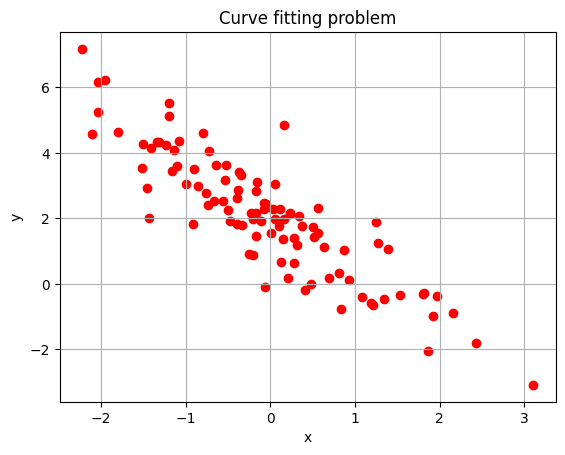

In [146]:
## genrate sunthetic dataset
slope, intercept = -1.5, +2
N = 100
x = np.random.randn(N)
y = slope*x + intercept + np.random.randn(N)

plt.scatter(x,y, color='red')
plt.title('Curve fitting problem')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

In [155]:
# Least Square Method
# solve A.T@A.x_hat = A.T.b
ones = np.ones((N,1))
A = np.concatenate((x.reshape(N,1), ones), axis=1) # stack it below
b = y.reshape(N,1)


# x_hat = np.linalg.solve(A.T@A , A.T@b)
# instead of solving the above we solve Rx = QT.b which can be solved faster using forward substitution as R iss triangular
Q, R = qr(A)
x_hat = np.linalg.solve(R, Q.T @ b)
print('           actual', '       estimated')
print('-----------------------------------')
print(f'slope     : {slope}  {x_hat[0][0]}')
print(f'intercept : {intercept}     {x_hat[1][0]}')

           actual        estimated
-----------------------------------
slope     : -1.5  -1.565188238323764
intercept : 2     1.9938747166557091


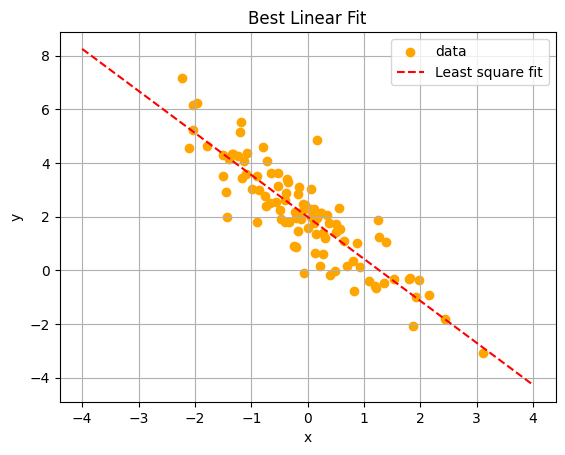

In [161]:
slope_hat = x_hat[0][0]
intercept_hat = x_hat[1][0]

t = np.linspace(-4,4,100)
plt.scatter(x, y, color='orange', label='data')
plt.plot(t, slope_hat*t + intercept_hat, '--', color='red', label='Least square fit')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.title('Best Linear Fit')
plt.legend()
plt.show()

Proof:

For system $Ax = b$, we solve for the best solution as:

$x = (A^{T}A)^{-1}A^{T}b$, write $A = QR$ to get:

$x = (R^{T}Q^{T}Q R)^{-1}R^{T}Q^{T}b = (R^{T}R)^{-1}R^{T}Q^{T}b = R^{-1}R^{-T}R^{T}Q^{T}b = R^{-1}Q^{T}b$

which is equivalent to solving : $Rx = Q^{T}b$



## Eigen Decomposition

### Method/Algo.

**THEORY :**

Given a square matrix $A_{n \times n}$, we decompose it as:
$$A = Q\Lambda Q^{-1}$$
where,

$$Q_{n \times n} = \begin{bmatrix}
    \vert & \vert & & \vert \\
    q_{1}   & q_{2} &\dots &  q_{n}\\
    \vert & \vert & & \vert
\end{bmatrix}$$

$$\Lambda_{n \times n} = \begin{bmatrix}
    \lambda_{1} & 0  & \dots & 0\\
    0 & \lambda_{2} & \dots &0\\
    \vdots & \vdots & \ddots & 0\\
    0 & 0 & \dots & \lambda_{n}
\end{bmatrix}$$

$Q_{n \times n}$ (containing eigen vectors) is an orthonormal sq. matrix.
i.e $Q^{T} Q = I_{n}$ and $Q^{-1} = Q^{T}$. Also the norm $||q_{i}||_{2} = 1$.

$\Lambda_{n \times n}$ contains eigen values ($\lambda_{i}$) in its diagonal.


**ALGORITHM :**
$|A - \lambda I| = 0 $ will solve for eigen values of A. But this method does not always gives implicit solutions (for example polynomials of deg $\ge$ 5). So various numerical methods are used for this decomposition.


In [192]:
A_ = np.random.randn(3,3)
A = A_ + A_.T
lambdas, Q = eigh(A)
print(lambdas)

[-2.9715916   0.53932059  1.8919575 ]


In [193]:
A

array([[ 0.15710136, -1.63470655, -0.28182118],
       [-1.63470655, -1.07689676, -1.71303169],
       [-0.28182118, -1.71303169,  0.37948189]])

In [194]:
Lambda = np.diag(lambdas)
(Q @ Lambda @ Q.T)

array([[ 0.15710136, -1.63470655, -0.28182118],
       [-1.63470655, -1.07689676, -1.71303169],
       [-0.28182118, -1.71303169,  0.37948189]])

In [195]:
np.linalg.norm(Q, axis=0)

array([1., 1., 1.])

### Practical Use

* Page rank algo

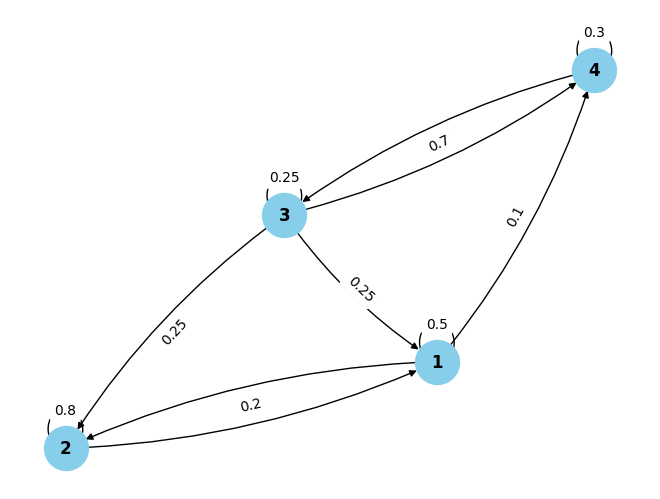

In [220]:
# visualize
# nodes correspons to websites and edges corresponds to link
# model the web as a graph with adjecency matrix whose ij'th entry determines the transition probability
# of going from i to j'th web page

# this is also called a markov chain model
G = nx.DiGraph()

G.add_nodes_from([1,2, 3,4])

# Add edges with labels
G.add_edge(1, 1, label='0.5')
G.add_edge(1, 2, label='0.4')
G.add_edge(1, 4, label='0.1')

G.add_edge(2, 1, label='0.2')
G.add_edge(2, 2, label='0.8')

G.add_edge(3, 1, label='0.25')
G.add_edge(3, 2, label='0.25')
G.add_edge(3, 3, label='0.25')
G.add_edge(3, 4, label='0.25')

G.add_edge(4, 3, label='0.7')
G.add_edge(4, 4, label='0.3')

pos = nx.spring_layout(G)  # Positions for all nodes
nx.draw(G, pos, connectionstyle='arc3, rad = 0.1', with_labels=True, node_color='skyblue', node_size=1000, font_size=12, font_weight='bold')
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()


In [229]:
### Page rank alog.
## generate adjecency matrix
Adj = np.zeros((4,4))
for u,v in edge_labels.keys():
  Adj[u-1, v-1] = float(edge_labels[(u,v)])
Adj

array([[0.5 , 0.4 , 0.  , 0.1 ],
       [0.2 , 0.8 , 0.  , 0.  ],
       [0.25, 0.25, 0.25, 0.25],
       [0.  , 0.  , 0.7 , 0.3 ]])

In [248]:
## finding steady state distribution
epsilon = 0.001 # small nudge so all nodes can be reached
Adj = Adj*(1-epsilon) + epsilon*Adj
eigs, eig_v = np.linalg.eig(Adj.T)

In [249]:
eigs

array([-0.11172073,  0.28392751,  1.        ,  0.67779322])

In [256]:
index = np.argmin(np.abs(eigs - 1))
steady_state = np.real(eig_v[:,index])
steady_state /= np.sum(steady_state)
print('More the rank, it will appear in top searches')
print('Page RANK:', steady_state)
print('clearly node(page 1) has highest rank')

More the rank, it will appear in top searches
Page RANK: [0.2796234  0.62915264 0.03130466 0.0599193 ]
clearly node(page 1) has highest rank


In [253]:
## simulate to find it indeed ranks the pages
distri = np.array([1,1,1,1])/4
for _ in range(100):
  distri = Adj.T @ distri
distri # clearly the final steady state distribution convergees to above rank

array([0.27290448, 0.61403509, 0.0545809 , 0.05847953])

## References

In [ ]:
# https://www.math.ucdavis.edu/~linear/old/notes11.pdf